In [6]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sn
sn.set(color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore



# 1. Data analysis

In [9]:
creditData = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
print(creditData.shape)
print(len(creditData.index))
creditData.head()



(5000, 14)
5000


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
print(creditData.isnull().sum())


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [32]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [33]:
creditData.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [34]:
creditData.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


# Q 3. Get the target column distribution. Your comments 

In [35]:
print(creditData[creditData['Personal Loan'] == 1].shape)
print(creditData[creditData['Personal Loan'] == 0].shape)

(480, 14)
(4520, 14)


(array([4520.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         480.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

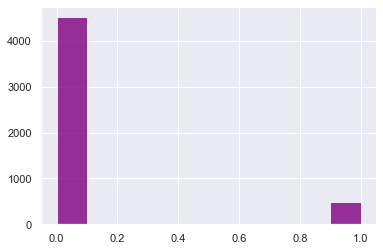

In [36]:
plt.hist(creditData['Personal Loan'], color = 'purple', alpha = .8)


### Analysis Result : It is clear from the data itself that 75 % of the people have not opted out for personal loan

 # Q. 2  Study the data distribution in each attribute, share your findings 
 ## 2.a  distribution of continuous variables

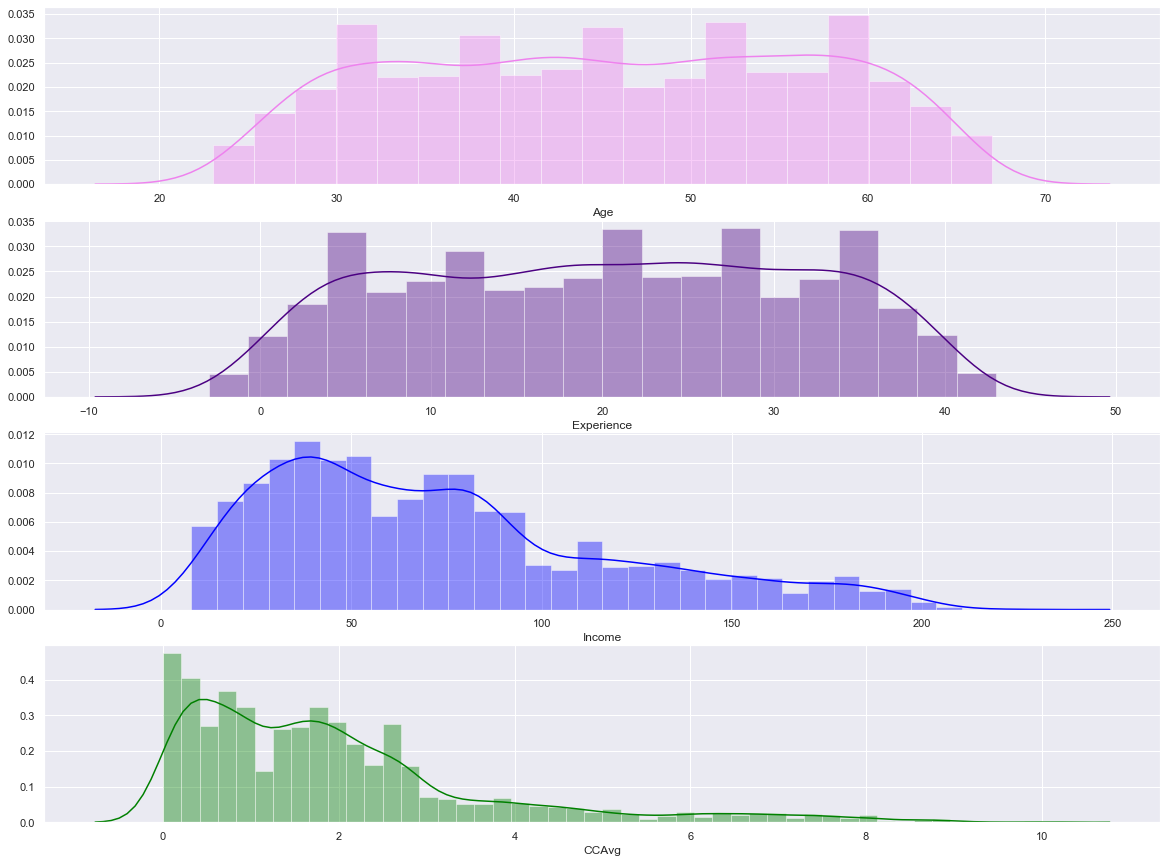

In [37]:

plt.figure(figsize= (20,15))
plt.subplot(4,1,1)
sn.distplot(creditData['Age'], color = 'violet')
plt.xlabel('Age')

plt.subplot(4,1,2)
sn.distplot(creditData['Experience'], color = 'indigo')
plt.xlabel('Experience')

plt.subplot(4,1,3)
sn.distplot(creditData['Income'], color = 'blue')
plt.xlabel('Income')

plt.subplot(4,1,4)
sn.distplot(creditData['CCAvg'], color = 'green')
plt.xlabel('CCAvg')

plt.show()


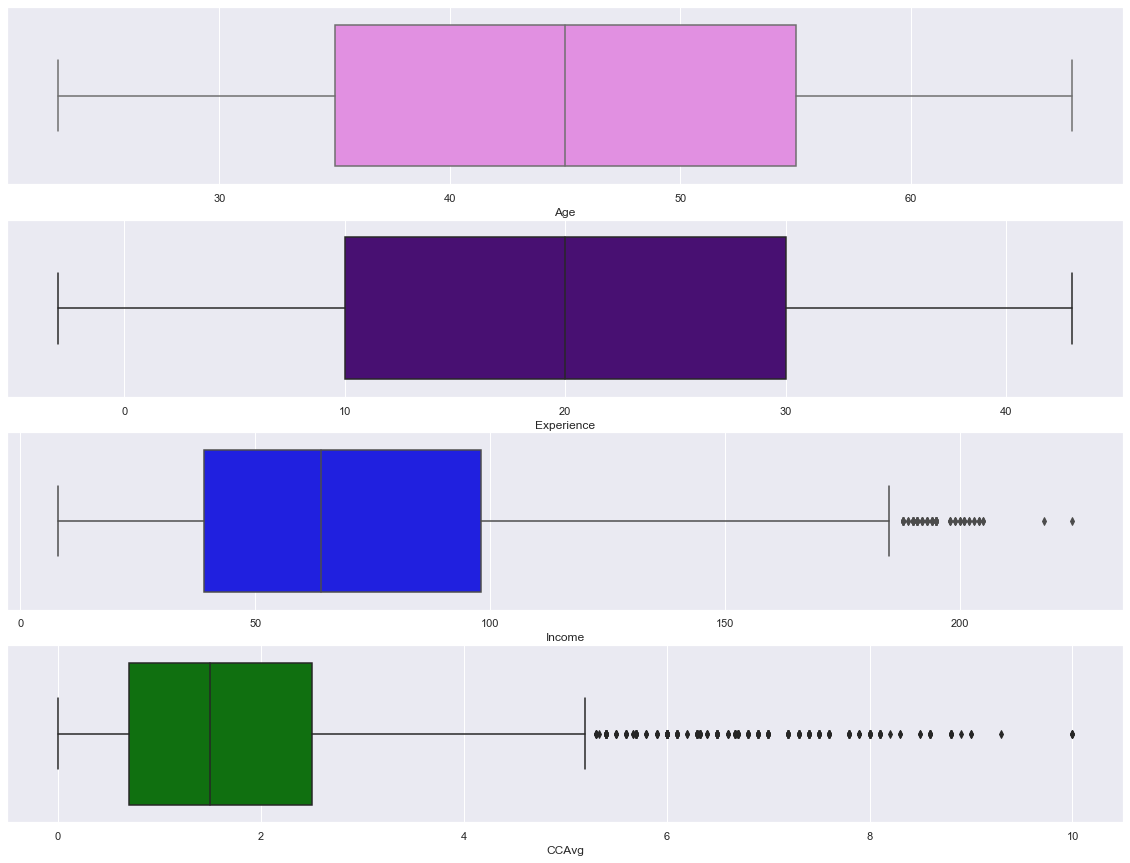

In [38]:
plt.figure(figsize= (20,15))
plt.subplot(4,1,1)
sn.boxplot(x = creditData['Age'], color = 'violet')
plt.xlabel('Age')

plt.subplot(4,1,2)
sn.boxplot(x = creditData['Experience'], color = 'indigo')
plt.xlabel('Experience')

plt.subplot(4,1,3)
sn.boxplot(x = creditData['Income'], color = 'blue')
plt.xlabel('Income')

plt.subplot(4,1,4)
sn.boxplot(x = creditData['CCAvg'], color = 'green')
plt.xlabel('CCAvg')

plt.show()

### Analysis Result: 
### 1.  Age and Experience are quite uniformly distributed
### 2.  Income and CCAvg are right skewed with many outliners

## 2.b Distribution of categorical variable

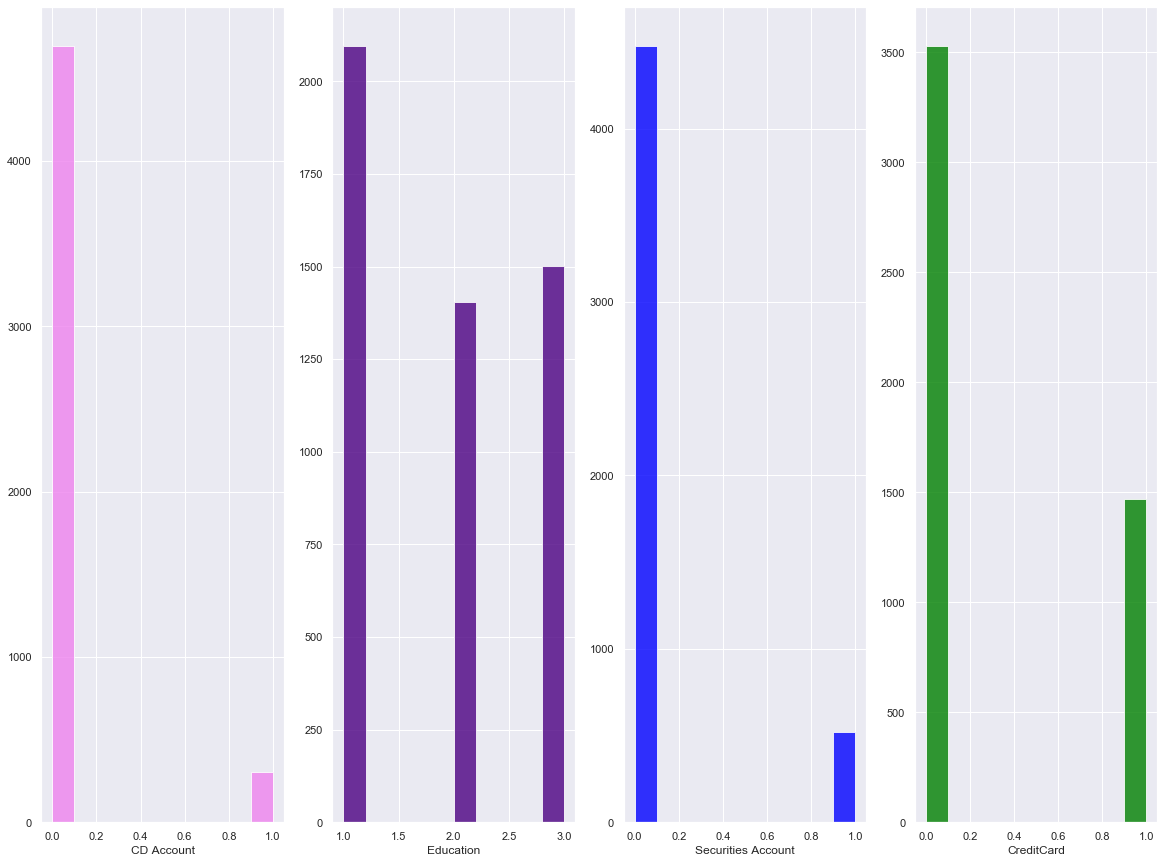

In [39]:
plt.figure(figsize= (20,15))
plt.subplot(1,4,1)
plt.hist(creditData['CD Account'], color = 'violet', alpha = .8)
plt.xlabel('CD Account')

plt.subplot(1,4,2)
plt.hist(creditData['Education'], color = 'indigo', alpha = .8)
plt.xlabel('Education')

plt.subplot(1,4,3)
plt.hist(creditData['Securities Account'], color = 'blue', alpha = .8)
plt.xlabel('Securities Account')

plt.subplot(1,4,4)
plt.hist(creditData['CreditCard'], color = 'green', alpha = .8)
plt.xlabel('CreditCard')

plt.show()

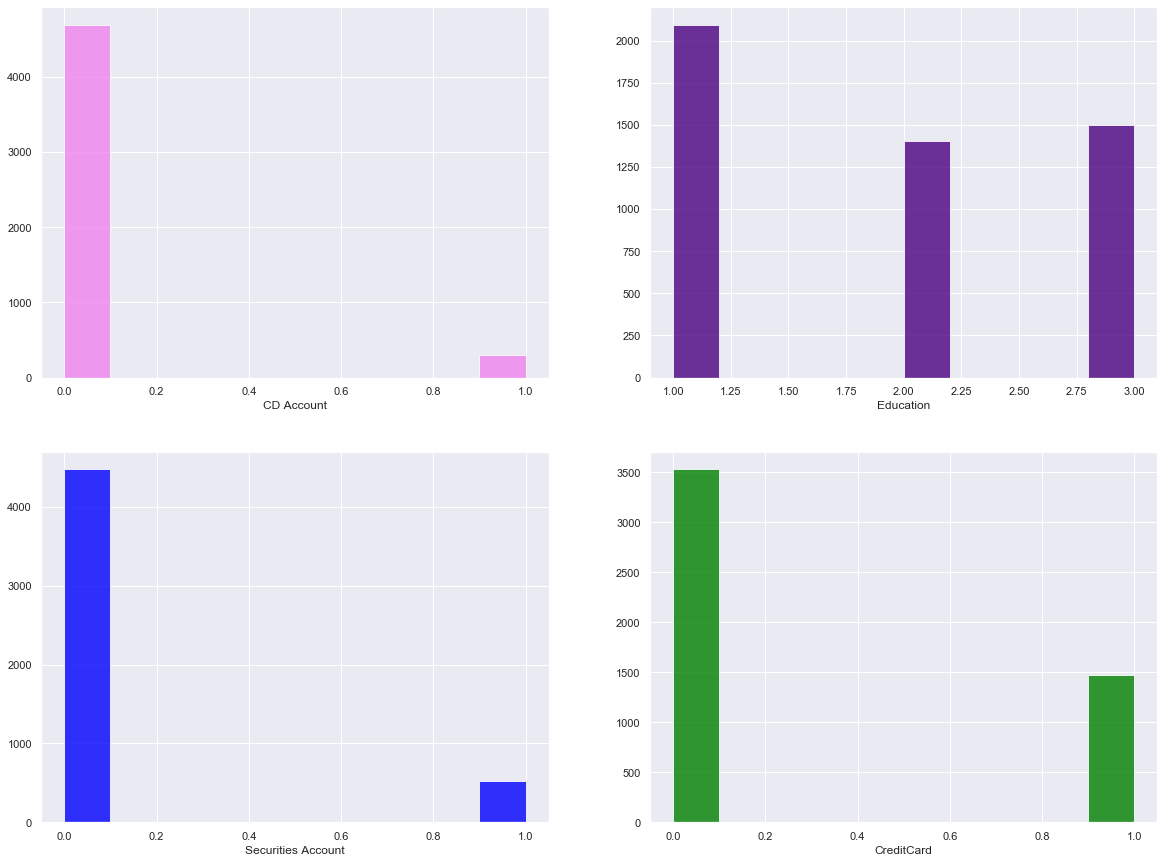

In [40]:
# just to study how subplots work
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.hist(creditData['CD Account'], color = 'violet', alpha = .8)
plt.xlabel('CD Account')

plt.subplot(2,2,2)
plt.hist(creditData['Education'], color = 'indigo', alpha = .8)
plt.xlabel('Education')

plt.subplot(2,2,3)
plt.hist(creditData['Securities Account'], color = 'blue', alpha = .8)
plt.xlabel('Securities Account')

plt.subplot(2,2,4)
plt.hist(creditData['CreditCard'], color = 'green', alpha = .8)
plt.xlabel('CreditCard')

plt.show()

In [41]:
temp =  creditData[(creditData['Securities Account'] == 1) & (creditData['CD Account'] == 1) & (creditData['CreditCard'] == 1) & (creditData['Online'] == 1)]
print(temp.shape)
temp.head()
temp1 = temp[ temp['Personal Loan'] == 1]
print(temp1.shape)
# trying to see if these categorical variables have any specific impact on people opting for loan, but it seems they have no concrete contribution in personal loan

(86, 14)
(10, 14)


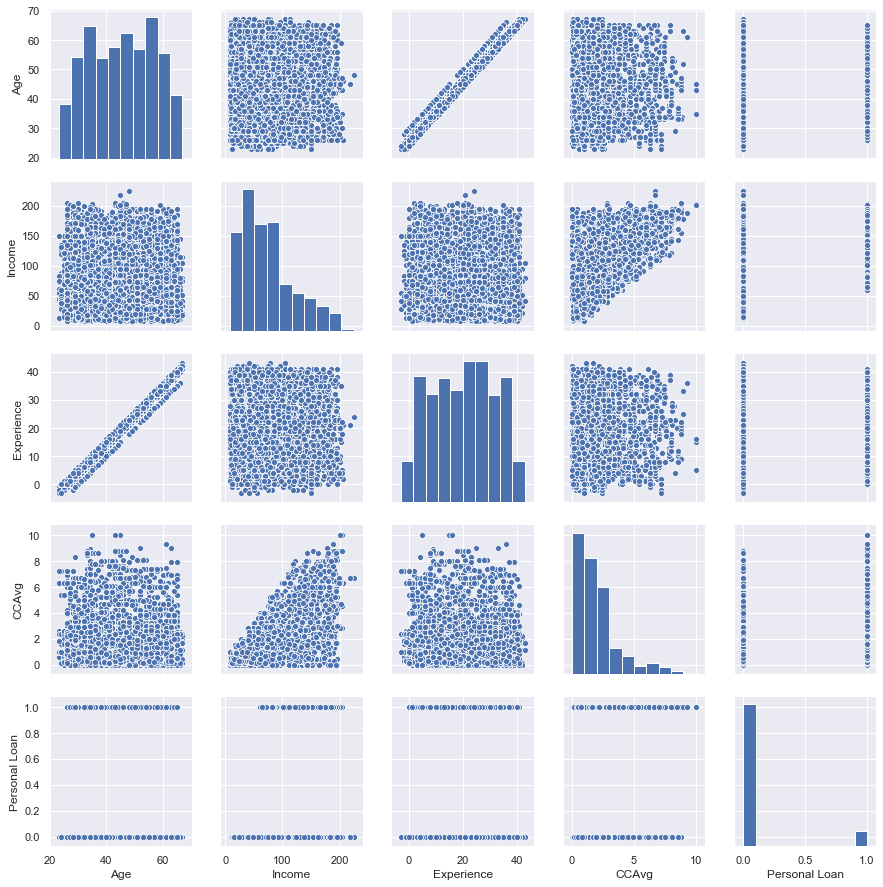

In [42]:
sn.pairplot(creditData[['Age', 'Income','Experience', 'CCAvg','Personal Loan']])

# people with higher income spends more on Credit Card

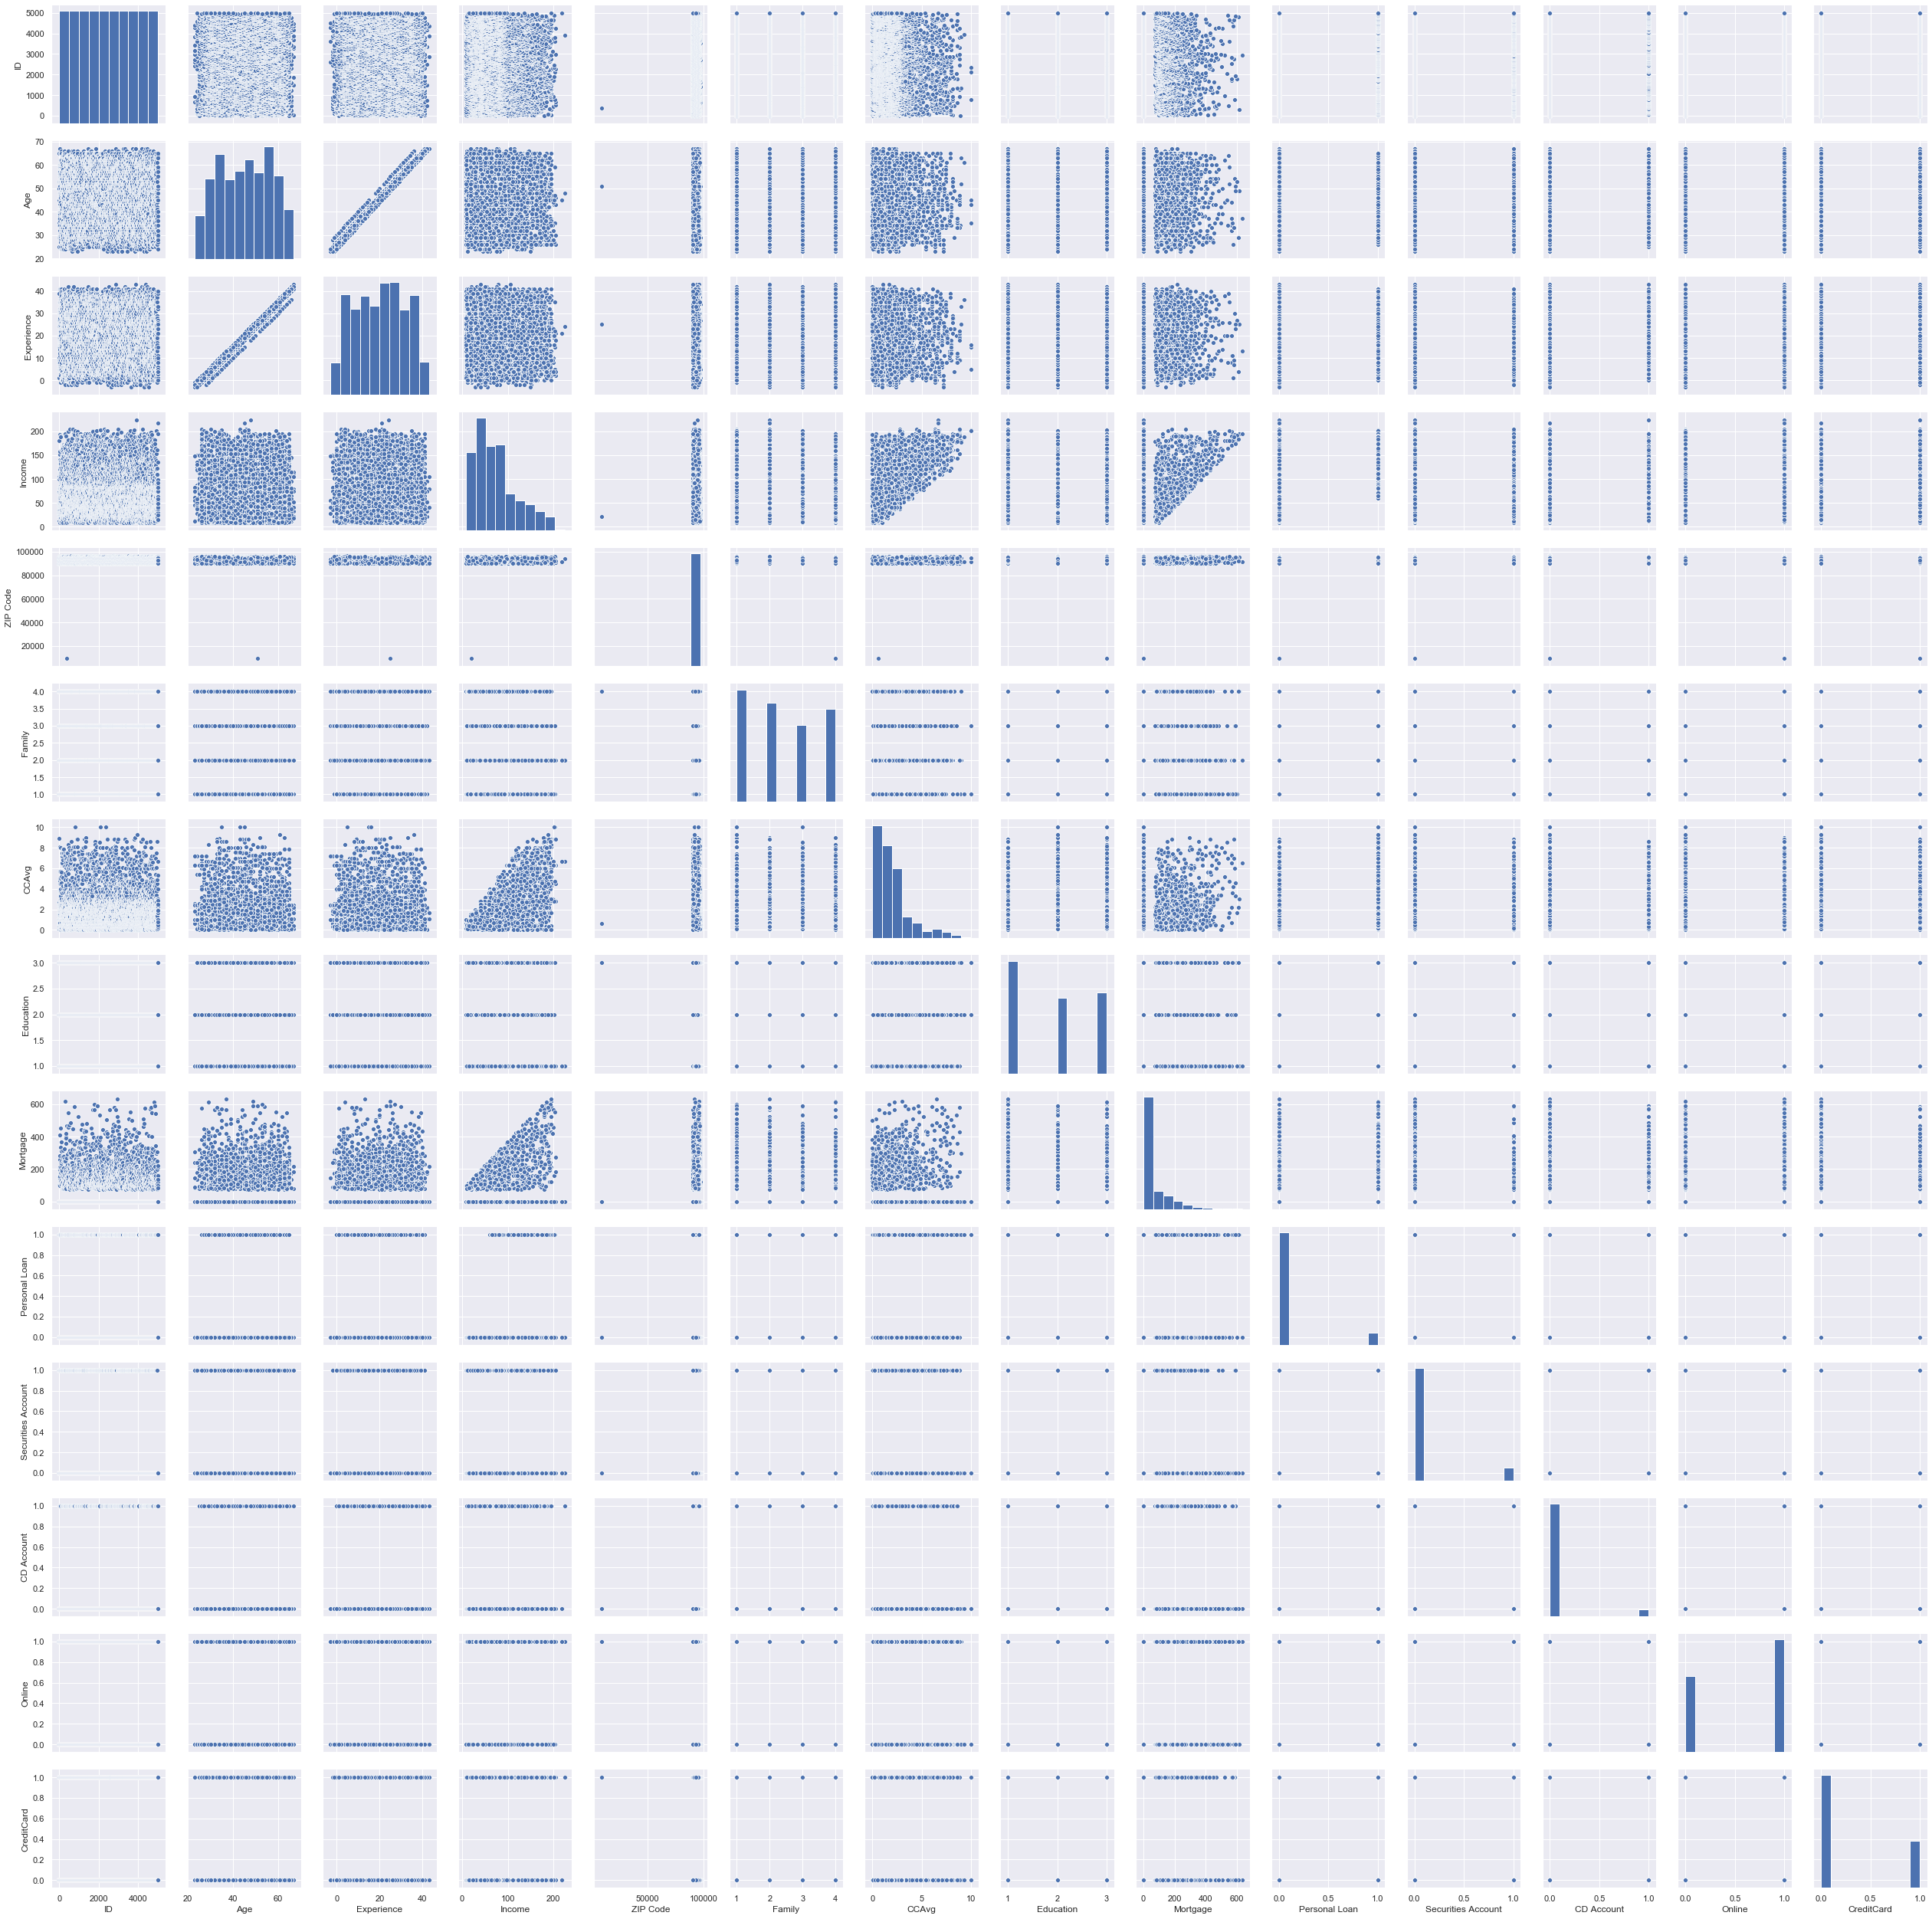

In [43]:
sn.pairplot(creditData)

# Q. 4 Split the data into training and test set in the ratio of 70:30 respectively  

In [44]:
X = creditData.drop('Personal Loan', axis = 1)
Y = creditData['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13,21,95518,3,0.2,2,0,0,0,1,0


# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans 

### 1. Logistic Regression

In [46]:
print(len(x_train))
print(len(creditData.index))
print("Percentage of data in training data{0:0.2f}%".format((len(x_train)/len(creditData.index)) * 100))
print("Percentage of data in test data {0:0.2f}%".format((len(x_test)/len(creditData.index)) * 100))

3500
5000
Percentage of data in training data70.00%
Percentage of data in test data 30.00%


In [61]:
# finding actual percentage of people who have  and have notopted for loan
optedcount = len(creditData[creditData['Personal Loan'] == 1])
opted = len(creditData[creditData['Personal Loan'] == 1])/len(creditData.index)
print("{0} ({1:0.2f}%) people out of complete population of have opted for loan".format(optedcount, opted *100))

notOptedCount = len(creditData[creditData['Personal Loan'] == 0])
notOpted = len(creditData[creditData['Personal Loan'] == 0])/len(creditData.index)
print("{0} ({1:0.2f}%) people out of complete population of have not opted for loan".format(notOptedCount, notOpted *100))

480 (9.60%) people out of complete population of have opted for loan
4520 (90.40%) people out of complete population of have not opted for loan


In [63]:
# training data with personal loan value as 1
actualPositiveInTrain = len(y_train[y_train == 1])/len(y_train.index)
print("{0} ({1:0.2f})% people in training data set who have opted for loan".format(len(y_train[y_train == 1]), actualPositiveInTrain * 100)) 

# training data with personal loan value as 0

actualNegativeInTrain = len(y_train[y_train == 0])/len(y_train.index)
print("{0} ({1:0.2f})% people in training data set who have not opted for loan".format(len(y_train[y_train == 0]), actualNegativeInTrain * 100)) 

# test data with personal loan value as 1
actualPositiveInTest = len(y_test[y_test == 1])/len(y_test.index)
print("{0} ({1:0.2f})% people in test data set who have opted for loan".format(len(y_test[y_test == 1]), actualPositiveInTest * 100)) 

# test data with personal loan value as 0
actualNegativeInTest = len(y_test[y_test == 0])/len(y_test.index)
print("{0} ({1:0.2f})% people in test data set who have not opted for loan".format(len(y_test[y_test == 0]), actualNegativeInTest * 100))  

331 (9.46)% people in training data set who have opted for loan
3169 (90.54)% people in training data set who have not opted for loan
149 (9.93)% people in test data set who have opted for loan
1351 (90.07)% people in test data set who have not opted for loan


In [66]:
# building a model
# Fit the model on train
model = LogisticRegression()
model.fit(x_train, y_train)
model_score = model.score(x_test, y_test)
print(model_score)


0.9213333333333333
[0 0 0 ... 0 0 0]


c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [95]:
#Predict for train set
pred_train = model.predict(x_train)
confmat_train = confusion_matrix(y_train,pred_train)
print("confusion matrix = \n",confmat_train)

#Accuracy,Precision and Recall in training dataset
print(recall_score(y_train, pred_train, average="macro"))
print(precision_score(y_train, pred_train, average="macro"))
print(accuracy_score(y_train, pred_train))

confusion matrix = 
 [[3096   73]
 [ 184  147]]
0.7105365516965239
0.8060421286031042
0.9265714285714286


In [96]:
#Predict for test set
pred_test = model.predict(x_test)
confmat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",confmat_test)

#Precision and Recall in training dataset
print(recall_score(y_test, pred_test, average="macro"))
print(precision_score(y_test, pred_test, average="macro"))
print(accuracy_score(y_test, pred_test))

confusion matrix = 
 [[1320   31]
 [  87   62]]
0.6965807082995942
0.8024164889836531
0.9213333333333333


[[1320   31]
 [  87   62]]


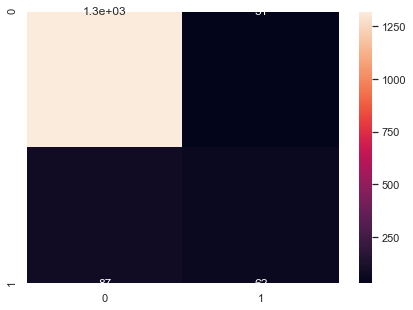

In [146]:
# Printing confusion metrics
logisticcm=metrics.confusion_matrix(y_test, pred_test)

plt.figure(figsize = (7,5))
sn.heatmap(logisticcm, annot = True)
print(logisticcm)

0.6965807082995942


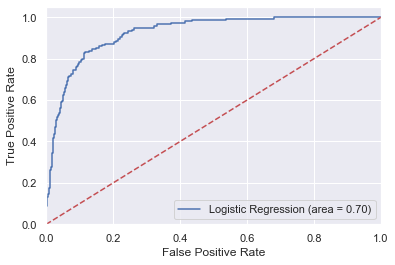

In [144]:
# ROC curve
roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
print(roc_auc)

### Observation
#### 1. Area under curve is 70% which is above the threshold which is nearly 65 %. Lets check if other models have better accuracy and precision

### 2. Naive-Bayes

In [102]:

# creatw the model
gaus_model = GaussianNB()
gaus_model.fit(x_train, y_train)

#Accuracy test on training data
gaus_train_predict = gaus_model.predict(x_train)
print(gaus_model.score(x_train, y_train))
#Other way of calculating accuracy
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, gaus_train_predict)))

#Precision and Recall Test
print("Precision: ", precision_score(y_train, gaus_train_predict))
print("Recall:", recall_score(y_train, gaus_train_predict))


0.8948571428571429
Model Accuracy: 0.8949
Precision:  0.4576659038901602
Recall: 0.6042296072507553


In [105]:
# Accuracy Precision and Recall Test
gaus_test_predit = gaus_model.predict(x_test)
print(gaus_model.score(x_test, y_test))
print("Precision: ", precision_score(y_test, gaus_test_predit))
print("Recall:", recall_score(y_test, gaus_test_predit))

0.8826666666666667
Precision:  0.43147208121827413
Recall: 0.5704697986577181


[[1239  112]
 [  64   85]]


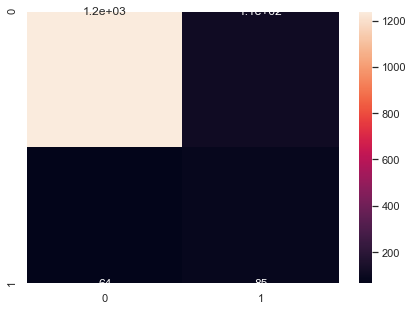

In [109]:
# confusion matrix

GausConfMetrix = metrics.confusion_matrix(y_test, gaus_test_predit)
plt.figure(figsize = (7,5))
sn.heatmap(GausConfMetrix, annot = True)
print(GausConfMetrix)

### Observation
#### It seems the accuracy precision and recall of naive bayes is less as compared to Logistic Regression

### 3. KNN

In [113]:
# Normalization
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
XScaled.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.731704,-1.774417,-1.666078,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
1,-1.731012,-0.029524,-0.096330,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
2,-1.730319,-0.552992,-0.445163,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
3,-1.729626,-0.901970,-0.968413,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4,-1.728933,-0.901970,-1.055621,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632


In [ ]:
# try another encoding technique too

In [118]:
Xnew_train, Xnew_test, ynew_train, ynew_test = train_test_split(XScaled, Y, test_size=0.30, random_state=1)

In [124]:
# trying with k = 3
k3 = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
k3.fit(Xnew_train, ynew_train)

#Accuracy
print("Accuracy in training : ", k3.score(Xnew_train, ynew_train))

#Precision and Recall on trining data
knn_train_predict = k3.predict(Xnew_train)
print("Precision in training: ", precision_score(ynew_train, knn_train_predict))
print("Recall in training: ", recall_score(ynew_train, knn_train_predict))

# Accuracy Precision and Recall in test data
knn_test_predict = k3.predict(Xnew_test)
print("Accuracy in test: ", k3.score(Xnew_test, ynew_test))
print("Precision in test: ", precision_score(ynew_test, knn_test_predict))
print("Recall in test: ", recall_score(ynew_test, knn_test_predict))

Accuracy in training :  1.0
Precision in training:  1.0
Recall in training:  1.0
Accuracy in test:  0.944
Precision in test:  0.8571428571428571
Recall in test:  0.5234899328859061


[[1338   13]
 [  71   78]]


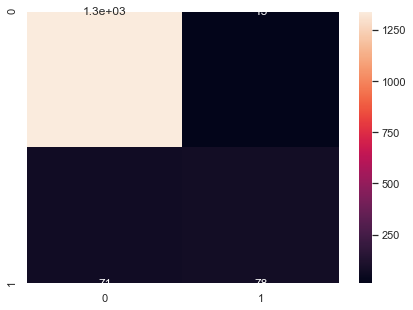

In [156]:
# confusion metrix
# for K =3
knnCm3 = metrics.confusion_matrix(ynew_test, knn_test_predict)
plt.figure(figsize = (7,5))
sn.heatmap(knnCm3, annot = True)
print(knnCm3)

In [125]:
# trying with k = 5 on training data
k5 = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
k5.fit(Xnew_train, ynew_train)

#Accuracy
print("Accuracy in training : ", k5.score(Xnew_train, ynew_train))

#Precision and Recall
kn5_train_predict = k5.predict(Xnew_train)
print("Precision in training : ", precision_score(ynew_train, kn5_train_predict))
print("Recall in training: ", recall_score(ynew_train, kn5_train_predict))

# Accuracy Precision and Recall in test data
kn5_test_predict = k5.predict(Xnew_test)
print("Accuracy in test: ", k5.score(Xnew_test, ynew_test))
print("Precision in test: ", precision_score(ynew_test, kn5_test_predict))
print("Recall in test: ", recall_score(ynew_test, kn5_test_predict))

Accuracy in training :  1.0
Precision in training :  1.0
Recall in training:  1.0
Accuracy in test:  0.944
Precision in test:  0.922077922077922
Recall in test:  0.47651006711409394


[[1345    6]
 [  78   71]]


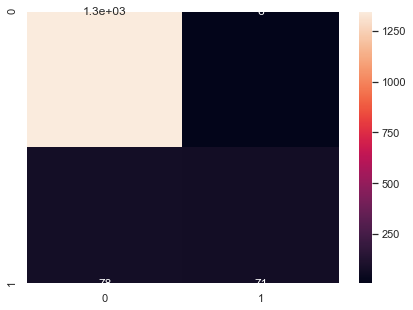

In [126]:
# confusion metrix
# for K =5
knnCm = metrics.confusion_matrix(ynew_test, kn5_test_predict)
plt.figure(figsize = (7,5))
sn.heatmap(knnCm, annot = True)
print(knnCm)

In [160]:
#Use k=5 as the final model for prediction
knn_classifier = KNeighborsClassifier(n_neighbors = 5)

# fitting the model
knn_classifier.fit(Xnew_train, ynew_train)
y_train_predict = knn_classifier.predict(Xnew_train)
print("Accuracy in training : ", accuracy_score(ynew_train, y_train_predict))
print("Recall in training : ", recall_score(ynew_train, y_train_predict))
print("Precision in training : ", precision_score(ynew_train, y_train_predict))
# predict the response
y_pred = knn_classifier.predict(Xnew_test)
print("Accuracy in test : ", accuracy_score(ynew_test, y_pred))
print("Recall in test : ", recall_score(ynew_test, y_pred))
print("Precision in test : ", precision_score(ynew_test, y_pred))

Accuracy in training :  0.9694285714285714
Recall in training :  0.6978851963746223
Precision in training :  0.9705882352941176
Accuracy in test :  0.9433333333333334
Recall in test :  0.4697986577181208
Precision in test :  0.9210526315789473


In [161]:
#Use k=3 as the final model for prediction
knn_classifier3 = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn_classifier3.fit(Xnew_train, ynew_train)
y_train_predict = knn_classifier3.predict(Xnew_train)
print("Accuracy in training : ", accuracy_score(ynew_train, y_train_predict))
print("Recall in training : ", recall_score(ynew_train, y_train_predict))
print("Precision in training : ", precision_score(ynew_train, y_train_predict))
# predict the response
y_pred = knn_classifier3.predict(Xnew_test)
print("Accuracy in test : ", accuracy_score(ynew_test, y_pred))
print("Recall in test : ", recall_score(ynew_test, y_pred))
print("Precision in test : ", precision_score(ynew_test, y_pred))

Accuracy in training :  0.9754285714285714
Recall in training :  0.7522658610271903
Precision in training :  0.9841897233201581
Accuracy in test :  0.9433333333333334
Recall in test :  0.5167785234899329
Precision in test :  0.8555555555555555


### Observations
#### 1.  KNN shows the best accuracy and precision with least errors FP and FN
#### 2. K = 3 shows best combination of accuracy prediction and recall. Hence preferred value for k is 3

# 6. Print the confusion matrix for all the above models  

### 1. Logistic Regression

[[1320   31]
 [  87   62]]
Classification Error Percentage in Logistic Regression is :  7.866666666666666


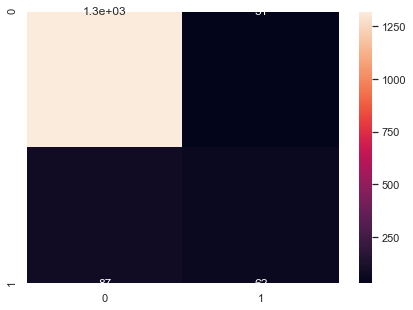

In [152]:
# Printing the same confusion matrix for logistic regression again for comparision

# Printing confusion metrics
logisticcm=metrics.confusion_matrix(y_test, pred_test)

plt.figure(figsize = (7,5))
sn.heatmap(logisticcm, annot = True)
print(logisticcm)

# Checking value of TP, TN, FP and FN

TP = logisticcm[0][0]
FP = logisticcm[0][1]
FN = logisticcm[1][0]
TN = logisticcm[1][1]

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print("Classification Error Percentage in Logistic Regression is : ", classification_error * 100)


### 2. Naive Bayes


[[1239  112]
 [  64   85]]
Classification Error Percentage in Naive Bayes is :  11.733333333333333


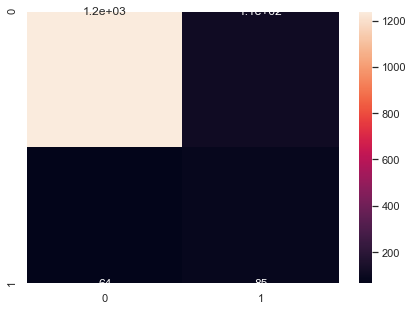

In [153]:
GausConfMetrix = metrics.confusion_matrix(y_test, gaus_test_predit)
plt.figure(figsize = (7,5))
sn.heatmap(GausConfMetrix, annot = True)
print(GausConfMetrix)
# Checking value of TP, TN, FP and FN

TP = GausConfMetrix[0][0]
FP = GausConfMetrix[0][1]
FN = GausConfMetrix[1][0]
TN = GausConfMetrix[1][1]

classification_error_gaussian = (FP + FN) / float(TP + TN + FP + FN)

print("Classification Error Percentage in Naive Bayes is : ", classification_error_gaussian * 100)

### 3. KNN

[[1338   13]
 [  71   78]]
Classification Error Percentage in Naive Bayes is :  5.6000000000000005


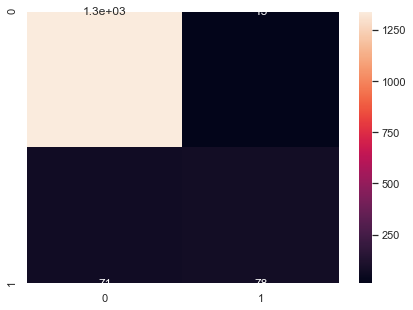

In [155]:
# confusion metrix
# for K =3
knnCm3 = metrics.confusion_matrix(ynew_test, knn_test_predict)
plt.figure(figsize = (7,5))
sn.heatmap(knnCm3, annot = True)
print(knnCm3)

# Checking value of TP, TN, FP and FN

TP = knnCm3[0][0]
FP = knnCm3[0][1]
FN = knnCm3[1][0]
TN = knnCm3[1][1]

classification_error_knn3 = (FP + FN) / float(TP + TN + FP + FN)

print("Classification Error Percentage in Naive Bayes is : ", classification_error_knn3 * 100)

# 7. Give your reasoning on which is the best model in this case and why it performs better? 

### 1. As far as Accuracy Precision and Recall is considered KNN provides best among all the three model.
### 2. Most important the claasification error is least in case of KNN